In [1]:
from typing import List
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

In [3]:
config_dirs = [
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab4/victim_on_type/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab4/victim_off_type/',
]

spec_names = sorted([
    'drmemtrace.omnetpp.552936.5555.dir',
    'drmemtrace.sgcc_base.mytest-m64.555062.6619.dir',
    'drmemtrace.specrand_i.553922.3230.dir',
    'drmemtrace.perlbench_s_base.mytest-m64.554262.0160.dir',
    'drmemtrace.leela_s_base.mytest-m64.555086.8417.dir',
    'drmemtrace.x264.555077.8155.dir',
    'drmemtrace.deepsjeng.553743.1618.dir',
    'drmemtrace.exchange2.553888.1738.dir',
    'drmemtrace.mcf_s_base.mytest-m64.554166.9011.dir',
    'drmemtrace.xalancbmk_s_base.mytest-m64.555084.9837.dir'
])

image_path = '/home/veteran/Computer-Architecture-Lab-CSE220/lab4/Images/'

In [4]:
def get_simple_name(spec_path: str) -> str:
    return spec_path.split('.')[1]

In [5]:
configs = ['VICTIM_CACHE_ON', 'VICTIM_CACHE_OFF']
simple_names = [get_simple_name(spec) for spec in spec_names]

In [6]:
def extract_one_spec(spec: str) -> List[float]:
    ipc_dict = dict()
    dcms_dict = dict()
    vch_dict = dict()
    cold_dict = dict()
    cpt_dict = dict()
    cft_dict = dict()
    dcms_no_dict = dict()
    for i, config in enumerate(config_dirs):
        stat_path = F'{config}{spec}/memory.stat.0.out'
        mem_file = open(stat_path)
        m_lines = mem_file.readlines()
        key = configs[i]
        ipc_dict[key] = float(m_lines[4].split()[-1])
        dcms_dict[key] = float(m_lines[31].split()[2][:-1])
        vch_dict[key] = float(m_lines[-4].split()[1])
        cold_dict[key] = float(m_lines[37].split()[1])
        cpt_dict[key] = float(m_lines[39].split()[1])
        cft_dict[key] = float(m_lines[41].split()[1])
        dcms_no_dict[key] = float(m_lines[31].split()[1])
    return ipc_dict, dcms_dict, vch_dict, cold_dict, cpt_dict, cft_dict, dcms_no_dict

In [7]:
spec_data = defaultdict(dict)
for spec in spec_names:
    data_lst = extract_one_spec(spec, )
    spec_data[get_simple_name(spec)]['ipc'] = data_lst[0]
    spec_data[get_simple_name(spec)]['dcms'] = data_lst[1]
    spec_data[get_simple_name(spec)]['vch'] = data_lst[2]
    spec_data[get_simple_name(spec)]['cold'] = data_lst[3]
    spec_data[get_simple_name(spec)]['cpt'] = data_lst[4]
    spec_data[get_simple_name(spec)]['cft'] = data_lst[5]
    spec_data[get_simple_name(spec)]['dcms_no'] = data_lst[6]

In [8]:
ipc_df = pd.DataFrame({key: spec_data[key]['ipc'] for key in spec_data})
dcms_df = pd.DataFrame({key: spec_data[key]['dcms'] for key in spec_data})
vch_df = pd.DataFrame({key: spec_data[key]['vch'] for key in spec_data})
cold_df = pd.DataFrame({key: spec_data[key]['cold'] for key in spec_data})
cpt_df = pd.DataFrame({key: spec_data[key]['cpt'] for key in spec_data})
cft_df = pd.DataFrame({key: spec_data[key]['cft'] for key in spec_data})
dcms_no_df = pd.DataFrame({key: spec_data[key]['dcms_no'] for key in spec_data})

ipc_df['average'] = ipc_df.mean(1)
dcms_df['average'] = dcms_df.mean(1)
vch_df['average'] = vch_df.mean(1)
cold_df['average'] = cold_df.mean(1)
cpt_df['average'] = cpt_df.mean(1)
cft_df['average'] = cft_df.mean(1)
dcms_no_df['average'] = dcms_no_df.mean(1)

In [9]:
ipc_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
VICTIM_CACHE_ON,1.93882,2.45767,1.60522,0.78381,1.20129,1.26584,1.22192,2.65907,2.93402,0.99269,1.706035
VICTIM_CACHE_OFF,1.92348,2.46473,1.59362,0.77881,1.19801,1.24599,1.21675,2.65873,2.92283,0.98934,1.699229


In [10]:
dcms_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
VICTIM_CACHE_ON,3.061,0.002,1.420,25.287,10.102,6.024,5.154,0.195,2.902,21.031,7.5178
VICTIM_CACHE_OFF,4.056,0.002,1.737,26.126,10.866,7.138,6.389,0.554,3.399,21.544,8.1811


In [11]:
vch_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
VICTIM_CACHE_ON,201559.0,118.0,75294.0,278693.0,221539.0,304072.0,294739.0,46336.0,68246.0,169420.0,166001.6
VICTIM_CACHE_OFF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
cold_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
VICTIM_CACHE_ON,27089.0,239.0,4077.0,345025.0,293163.0,32772.0,45292.0,157.0,90712.0,44339.0,88286.5
VICTIM_CACHE_OFF,27089.0,239.0,4077.0,345025.0,293163.0,32772.0,45292.0,157.0,90712.0,44339.0,88286.5


In [13]:
cpt_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
VICTIM_CACHE_ON,193780.0,383.0,291306.0,9411232.0,2274356.0,1528048.0,629682.0,347.0,850837.0,6112769.0,2129274.0
VICTIM_CACHE_OFF,193673.0,390.0,301869.0,9412298.0,2275725.0,1528383.0,632247.0,347.0,853019.0,6113075.0,2131102.6


In [14]:
cft_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
VICTIM_CACHE_ON,912611.0,113.0,220176.0,925902.0,2221820.0,1088262.0,1728636.0,62887.0,62539.0,1461448.0,868439.4
VICTIM_CACHE_OFF,1289063.0,289.0,325872.0,1352361.0,2606462.0,1599772.0,2320879.0,179731.0,234809.0,1683325.0,1159256.3


In [15]:
dcms_no_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
VICTIM_CACHE_ON,1133480.0,735.0,515559.0,10682159.0,4789339.0,2649082.0,2403610.0,63391.0,1004088.0,7618556.0,3085999.9
VICTIM_CACHE_OFF,1509825.0,918.0,631818.0,11109684.0,5175350.0,3160927.0,2998418.0,180235.0,1178540.0,7840739.0,3378645.4


In [16]:
def plot_ipc(start, end):
    x = np.arange(start = 0, stop = (end - start + 1) * 10, step = 10)
    width = 3.9
    sinlge_width = 3.9
    fig, ax = plt.subplots()
    plt.xlim((-8, 128))
    plt.ylim((0, 3.3))

    for i in range(len(configs)):
        ax.bar(x - width / 2 * (1 if i == 0 else -1), list(ipc_df.loc[configs[i], simple_names[start: end] + ['average']]), sinlge_width, label=configs[i], in_layout=False)
    ax.set_ylabel('Instruction / Cycle')
    ax.set_title('Instruction Per Cycle')
    ax.set_xticks(x, simple_names[start: end] + ['average'])
    ax.legend(loc='upper right')
    plt.subplots_adjust(bottom=0.2, right=1.3)
    plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
#     plt.show()
    plt.savefig(F'{image_path}/IPC_{start}{end}', dpi=200, bbox_inches='tight')

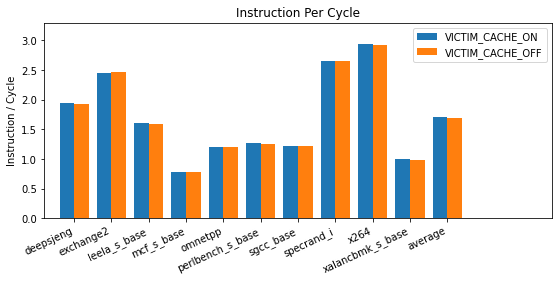

In [17]:
plot_ipc(0, 10)

In [18]:
def plot_dcms(start, end):
        specs = simple_names + ['average']
        x = np.arange(start = 0, stop = (end - start + 1) * 10, step = 10)
        width = 4.5
        sinlge_width = 4.5
        fig, ax = plt.subplots()
        plt.xlim((-8, 128))
        plt.ylim((0, 30))
        
        for i in range(2):
            ax.bar(x - width / 2 * (1 if i == 0 else -1), list(dcms_df.loc[configs[i], simple_names[start: end] + ['average']]), sinlge_width, label=configs[i], in_layout=False)

        ax.set_ylabel('DCache Miss Ratio %')
        ax.set_title('DCache Miss Ratio')
        ax.set_xticks(x, simple_names[start: end] + ['average'])
        ax.legend(loc='upper right')
        plt.subplots_adjust(bottom=0.2, right=1.3)
        plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
    #     plt.show()
        plt.savefig(F'{image_path}/DCACHE_MISS_{start}{end}', dpi=200, bbox_inches='tight')

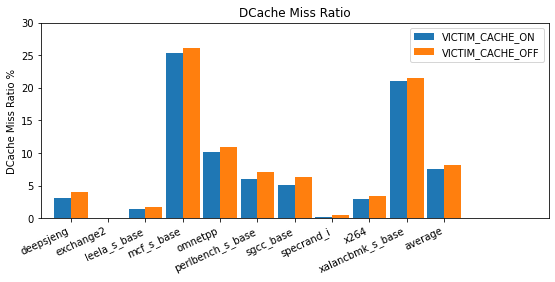

In [19]:
plot_dcms(0, 10)

In [20]:
def plot_vch(start, end):
        specs = simple_names + ['average']
        x = np.arange(start = 0, stop = (end - start + 1) * 10, step = 10)
        width = 4.5
        sinlge_width = 4.5
        fig, ax = plt.subplots()
        plt.xlim((-8, 128))
        plt.ylim((0, 350000))
        
        for i in range(2):
            ax.bar(x - width / 2 * (1 if i == 0 else -1), list(vch_df.loc[configs[i], simple_names[start: end] + ['average']]), sinlge_width, label=configs[i], in_layout=False)

        ax.set_ylabel('Victim Cache Hit')
        ax.set_title('Victim Cache Hit')
        ax.set_xticks(x, simple_names[start: end] + ['average'])
        ax.legend(loc='upper right')
        plt.subplots_adjust(bottom=0.2, right=1.3)
        plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
    #     plt.show()
        plt.savefig(F'{image_path}/VICTIM_CACHE_HIT_{start}{end}', dpi=200, bbox_inches='tight')

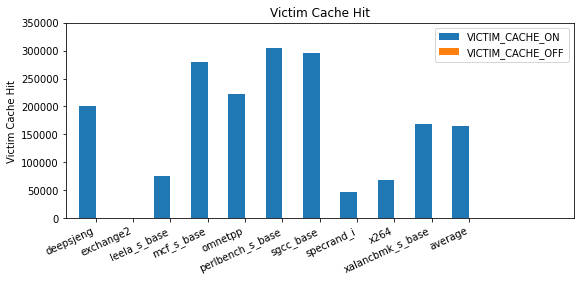

In [21]:
plot_vch(0, 10)

In [22]:
def plot_dcms_stacked(start, end):
        x = np.arange(start = 0, stop = (end - start + 1) * 10, step = 10)
        width = 4.5
        single_width = 4.5
        fig, ax = plt.subplots()
        plt.xlim((-8, 128))
        plt.ylim((0, 28))

        labeld = False
        
        for i in range(2):
            btm = list(cold_df.loc[configs[i], simple_names[start: end] + ['average']] * dcms_df.loc[configs[i], simple_names[start: end] + ['average']] / dcms_no_df.loc[configs[i], simple_names[start: end] + ['average']])
            mid = list(cpt_df.loc[configs[i], simple_names[start: end] + ['average']] * dcms_df.loc[configs[i], simple_names[start: end] + ['average']] / dcms_no_df.loc[configs[i], simple_names[start: end] + ['average']])
            top = list(cft_df.loc[configs[i], simple_names[start: end] + ['average']] * dcms_df.loc[configs[i], simple_names[start: end] + ['average']] / dcms_no_df.loc[configs[i], simple_names[start: end] + ['average']])
            btm_mid = list(cpt_df.loc[configs[i], simple_names[start: end] + ['average']] * dcms_df.loc[configs[i], simple_names[start: end] + ['average']] / dcms_no_df.loc[configs[i], simple_names[start: end] + ['average']] + \
                cold_df.loc[configs[i], simple_names[start: end] + ['average']] * dcms_df.loc[configs[i], simple_names[start: end] + ['average']] / dcms_no_df.loc[configs[i], simple_names[start: end] + ['average']])
            ax.bar(x - width / 2 * (1 if i == 0 else -1), btm, single_width, color='tab:red', label=F'Compulsory' if not labeld else '', in_layout=False)
            ax.bar(x - width / 2 * (1 if i == 0 else -1), mid, single_width, color='tab:blue', label=F'Capacity' if not labeld else '', bottom=btm, in_layout=False)
            ax.bar(x - width / 2 * (1 if i == 0 else -1), top, single_width, color='tab:orange', label=F'Conflict'  if not labeld else '', bottom=btm_mid, in_layout=False)
            labeld = True
        ax.set_ylabel('DCache Miss Ratio %')
        ax.set_title('DCache Miss Ratio (In Different Type)')
        ax.set_xticks(x, simple_names[start: end] + ['average'])
        ax.legend(loc='upper right')
        plt.subplots_adjust(bottom=0.2, right=1.3)
        plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
        plt.savefig(F'{image_path}/DCACHE_MISS_STACKED_{start}{end}', dpi=200, bbox_inches='tight')

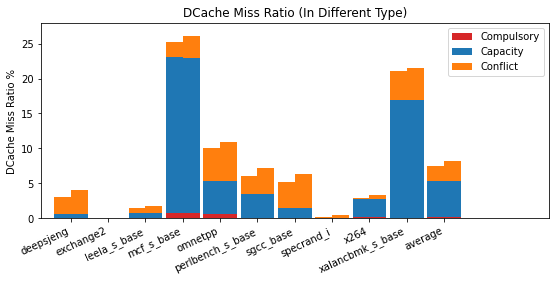

In [23]:
plot_dcms_stacked(0, 10)